# Time Series

* In this notebook we will study and apply the mathematical and statistical concepts seen in time series.

In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose # using time series analisys lib of statsmodel
from fbprophet import Prophet
# %matplotlib inline

* In the cell above we imported two of the most important libraries in time series forecasting:
    * statsmodel
    * Facebook's Prophet

## Data

In [18]:
dataset1 = "data/Electric_Production.csv"

In [19]:
df = pd.read_csv(dataset1, index_col = 0) #indexing is the date

In [20]:
df.head()

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


* We have 397 examples and the dates and the values of eletric production

In [21]:
df.shape

(397, 1)

* Converting the index to datetime

In [22]:
df.dtypes

Value    float64
dtype: object

In [25]:
df.index.dtype #object , we need to convert to datetime

dtype('O')

In [26]:
df.index = pd.to_datetime(df.index)

In [52]:
print(df.index.dtype) #ok now #distributed over months
df.index

datetime64[ns]


DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

In [45]:
df.info() #small dataset no null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [46]:
df.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


## Plotting the data

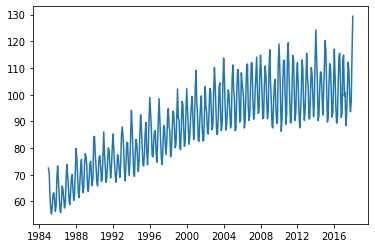

In [32]:
plt.plot(df);

## Decomposing the data with statsmodel

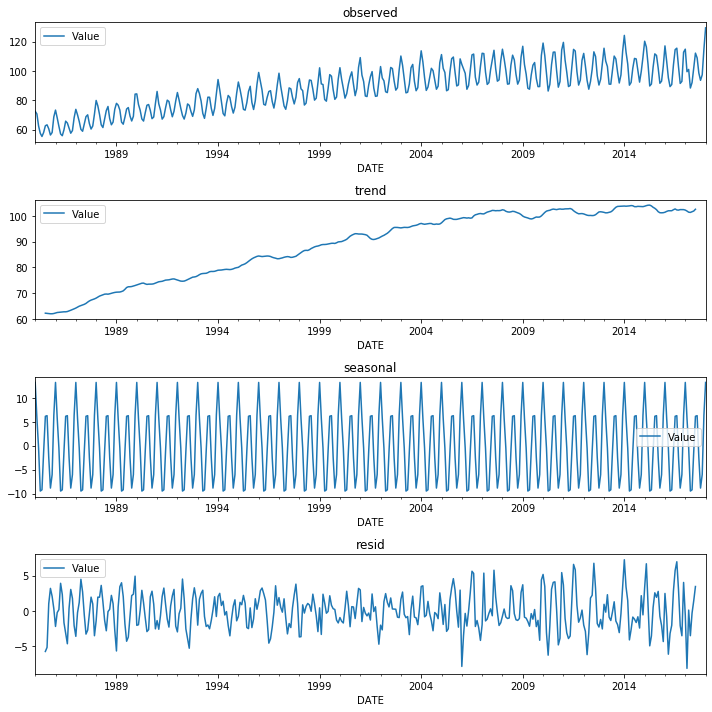

In [43]:
result = seasonal_decompose(df)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(10,10))
result.observed.plot(ax = ax1, title = "observed")
result.trend.plot(ax = ax2, title = "trend")
result.seasonal.plot(ax = ax3, title = "seasonal")
result.resid.plot(ax = ax4, title = "resid")
plt.tight_layout()

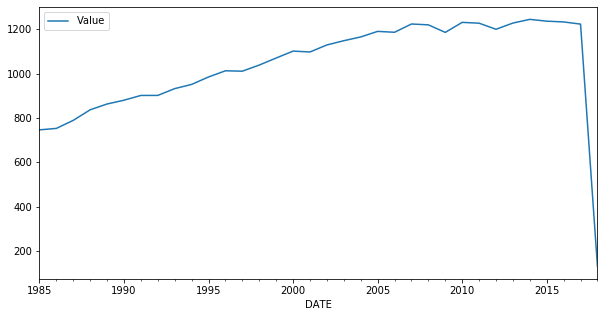

In [53]:
fig,ax = plt.subplots(figsize = (10,5)) #yearly
df.resample("Y").sum().plot(ax = ax)

In [55]:
df[df.index.year > 2015].index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

* We don't have complete data in 2018, that's the reason for the drop in the end of the yearly distribution plot

## Decomposing the data with Facebook's Prophet

In [56]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [58]:
prophet_df = df.reset_index().rename(columns={'DATE':'ds', 'Value':'y'})

model = Prophet()
model.add_country_holidays(country_name='BR')
model.fit(prophet_df)

# days prediction range
future = model.make_future_dataframe(periods=30)

#forecasting
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


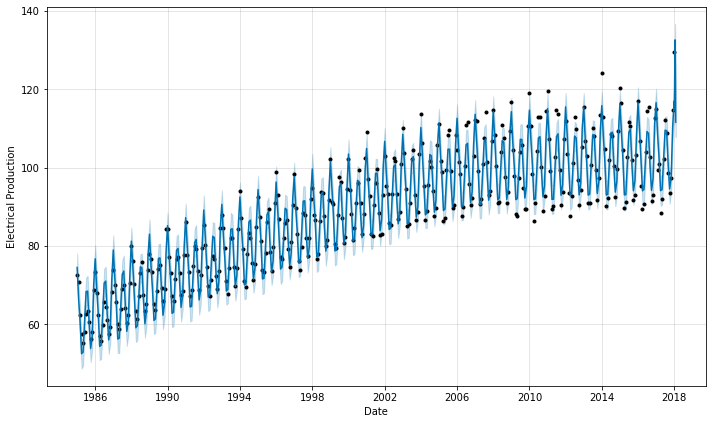

In [59]:
# visualizing
model.plot(forecast, xlabel='Date', ylabel='Electrical Production');

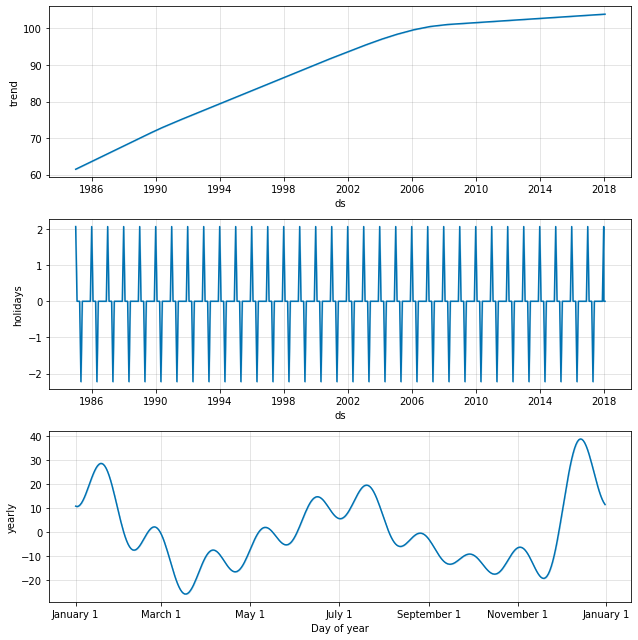

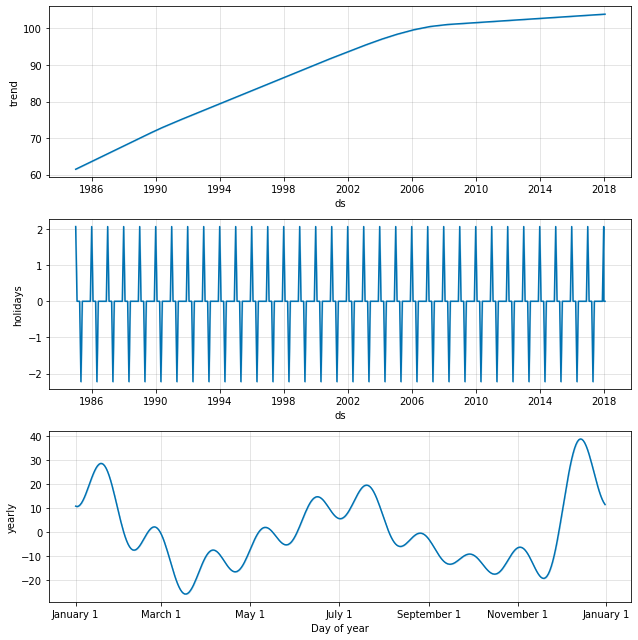

In [60]:
model.plot_components(forecast)